<a href="https://colab.research.google.com/github/sampiecz/490_ASSN2/blob/master/ASSN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data Set

import numpy as np

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0,0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1,4], [[1, .75], [.75, 1]], num_observations)

features = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.full(num_observations, -1), np.ones(num_observations)))

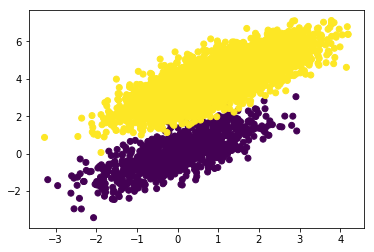

In [90]:
# Visualize the dataset
from matplotlib import pyplot as plt

plt.scatter(features[4000:, 0], features[4000:, 1], c=labels[4000:])
plt.show()

#################################

Numpy

#################################

Step: -3216.108309193215
Step: 78173.88124709182
Step: 155178.84433453064
Weights: [-241.30878123  -26.68187668  105.2586364 ]
Accuracy from scratch: 0.7993333333333333


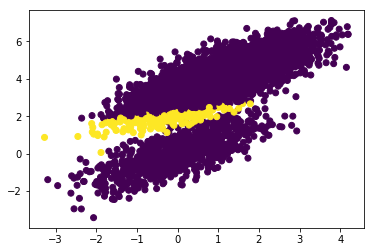

In [91]:
# Numpy Sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


# Numpy Log likelihood
def log_likelihood(features, target, weights):
  scores = np.dot(features, weights)
  log_likelihood = np.sum(target * scores - np.log(1 + np.exp(scores)))
  return log_likelihood


# Numpy Logistic regression
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with log likelihood gradient
        output_error_signal = target - predictions
        
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        # Print log-likelihood every so often
        if step % 10000 == 0:
            print ("Step: {}".format(log_likelihood(features, target, weights)))
        
    return weights

# Numpy weights generation
print("#################################\n")
print("Numpy\n")
print("#################################\n")
weights = logistic_regression(features[4000:], labels[4000:], num_steps = 30000, learning_rate = .00001, add_intercept=True)
print("Weights: {}".format(weights))


final_scores = np.dot(np.hstack((np.ones((features[4000:].shape[0], 1)), features[4000:])), weights)
preds = np.round(sigmoid(final_scores))
print ("Accuracy from scratch: {}".format((preds == labels[4000:]).sum().astype(float) / len(preds)))

# Numpy solution plot
plt.scatter(features[4000:, 0], features[4000:, 1], c = preds == labels[4000:] - 1,)
plt.show()



In [92]:
# Comparison to Sk-Learn
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = .00001)
clf.fit(features[4000:], labels[4000:])
print("#################################\n")
print("SK Learn\n")
print("#################################\n")
print("SK Learn Weights: {}".format(clf.intercept_, clf.coef_))
print("Accuracy from sk-learn: {}".format(clf.score(features[4000:], labels[4000:])))



#################################

SK Learn

#################################

SK Learn Weights: [0.01551661]
Accuracy from sk-learn: 0.9046666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
